## Assignment 6
    1. Name: Omkar Pawar
    2. Batch: R-9
    3. Roll No.: 43160
    
### Problem Statement :
    Object detection using transfer learning in CNN Architecture.

### Importing required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.14.0'

#### Data pre-processing

In [2]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1),
                                                                #shear_range=0.2,
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255,
                                                                validation_split=0.3)

In [4]:
root_dir = 'caltech-101'
img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation")

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


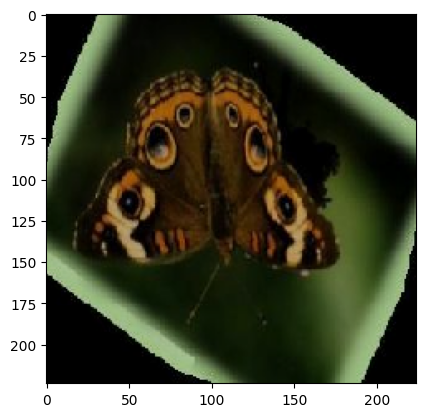

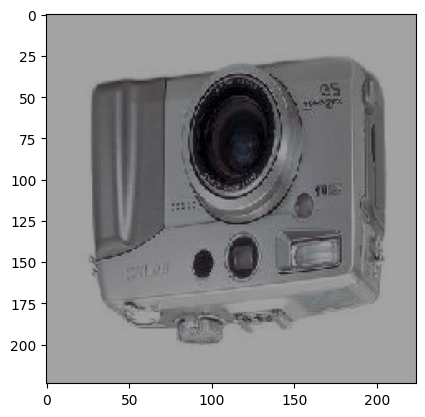

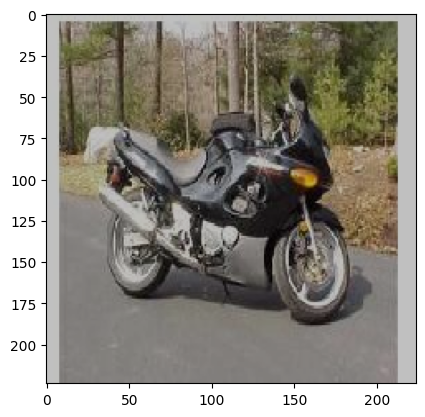

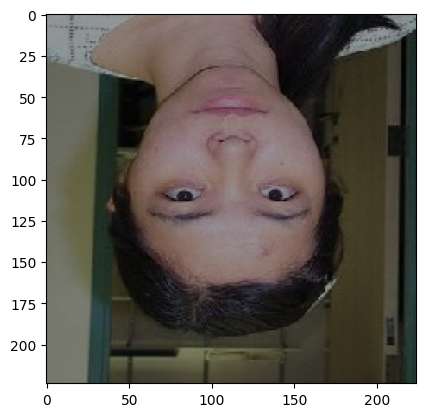

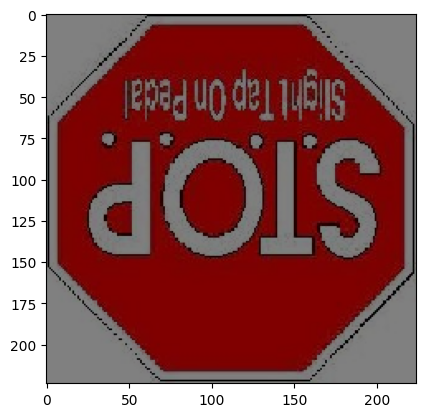

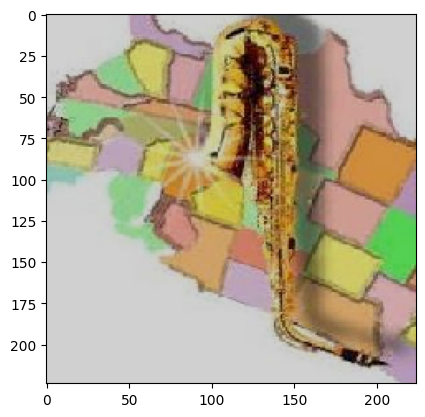

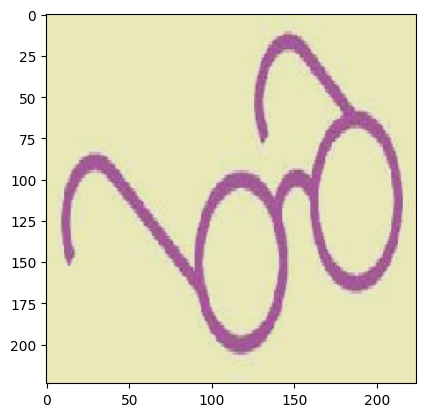

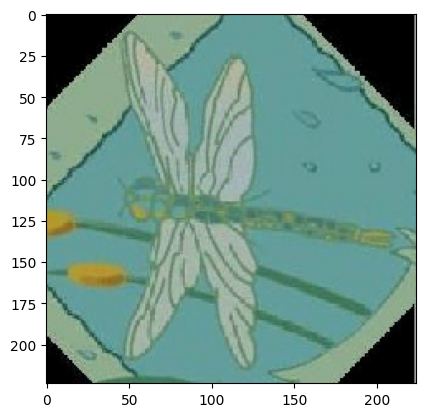

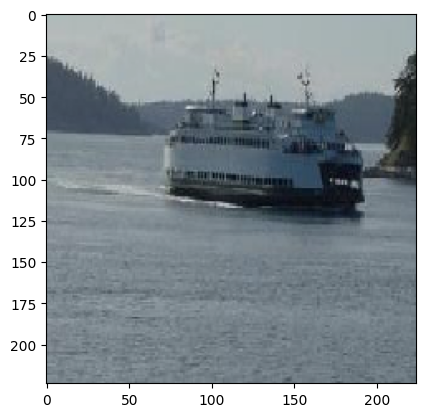

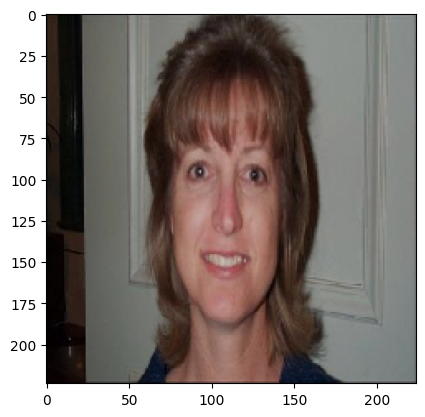

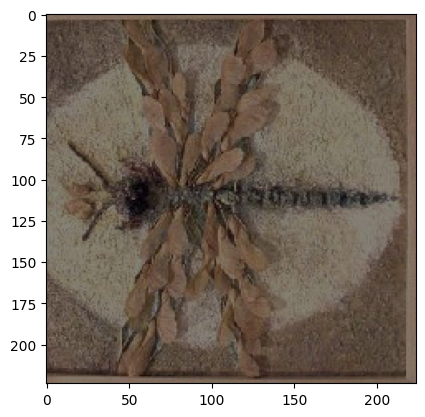

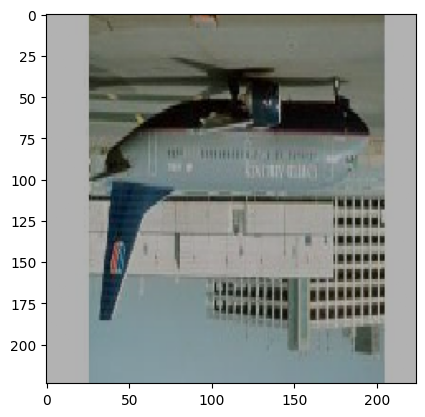

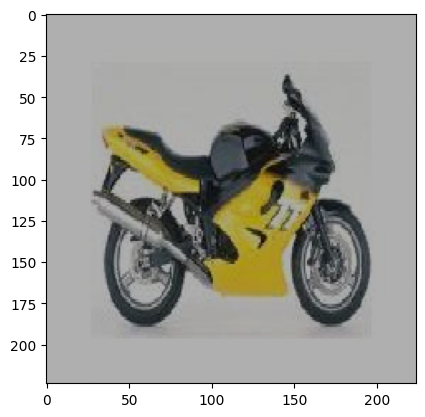

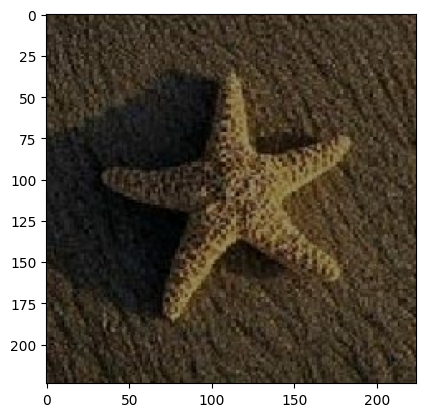

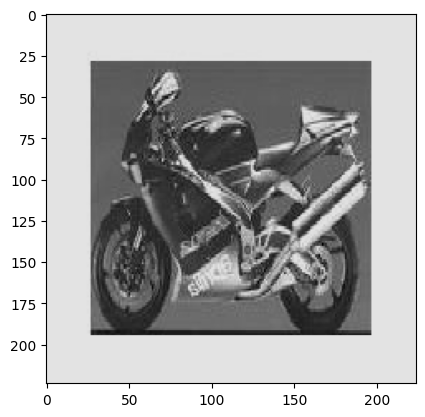

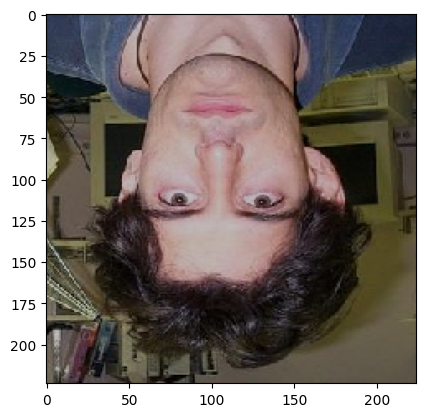

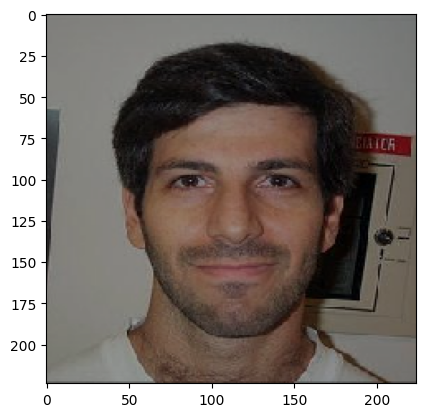

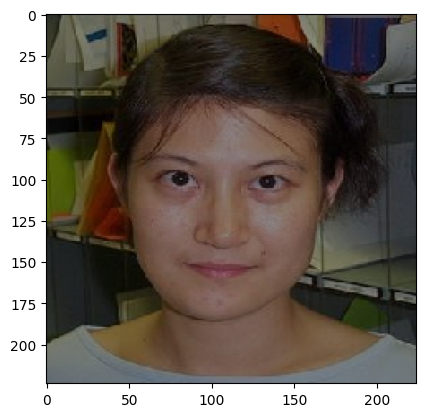

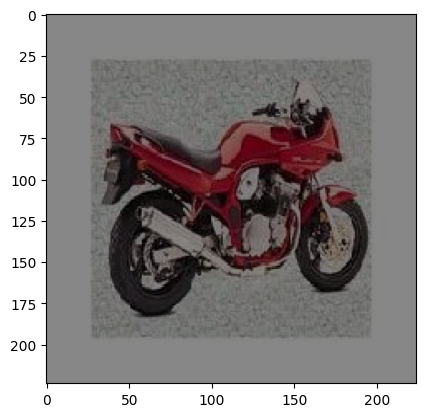

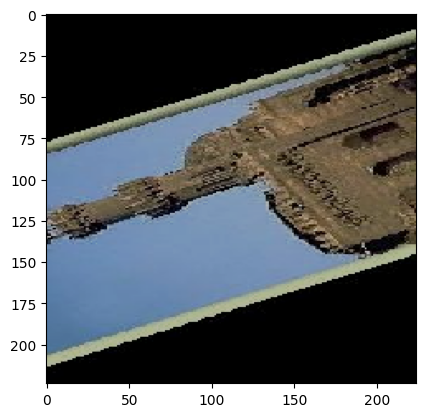

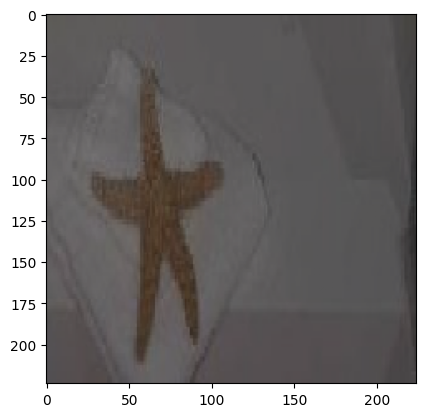

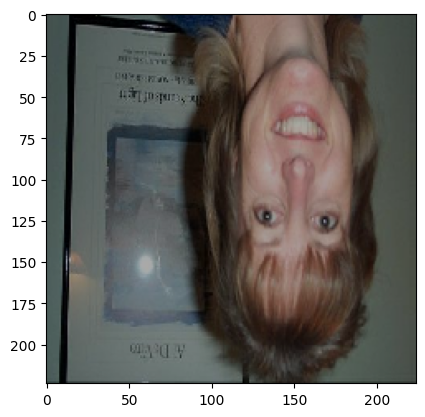

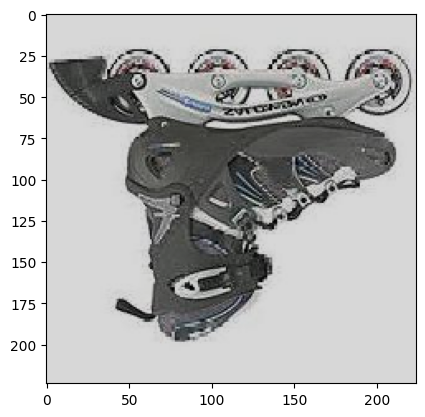

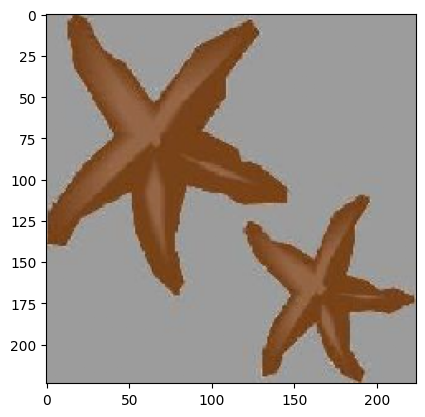

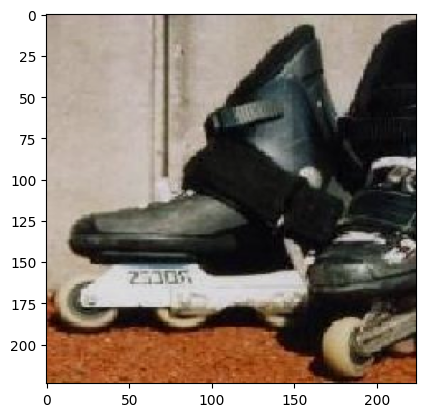

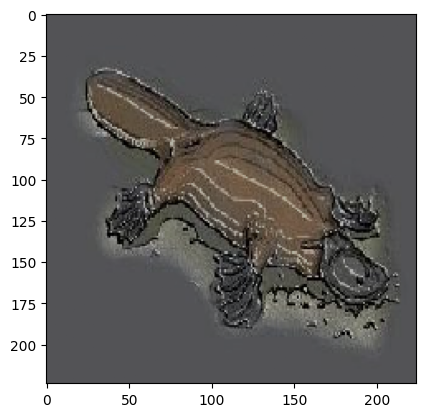

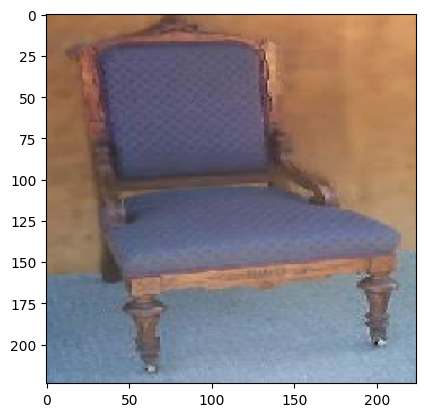

In [5]:
imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

### a. Load in pre-trained model

In [6]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

87910968/87910968 [==============================] - 124s 1us/step


### b. Freeze parameters (weights) in model’s lower convolutional layers

In [7]:
base_model.trainable = False

### c. Add custom classifier with several layers of trainable parameters to model

In [8]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 2048)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 102)               835686    
                                                                 
Total params: 22638470 (86.36 MB)
Trainable params: 835686 (3.19 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


### d. Train classifier layers on training data available for task

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [11]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=50)

Epoch 1/50
20/20 [==============================] - 53s 3s/step - loss: 9.6470 - categorical_accuracy: 0.2468 - val_loss: 5.3842 - val_categorical_accuracy: 0.4530
Epoch 2/50
20/20 [==============================] - 49s 3s/step - loss: 3.6111 - categorical_accuracy: 0.5565 - val_loss: 3.3397 - val_categorical_accuracy: 0.5622
Epoch 3/50
20/20 [==============================] - 49s 3s/step - loss: 2.6256 - categorical_accuracy: 0.6422 - val_loss: 2.7431 - val_categorical_accuracy: 0.6307
Epoch 4/50
20/20 [==============================] - 49s 3s/step - loss: 2.3072 - categorical_accuracy: 0.7078 - val_loss: 2.1935 - val_categorical_accuracy: 0.6548
Epoch 5/50
20/20 [==============================] - 49s 3s/step - loss: 1.7016 - categorical_accuracy: 0.7359 - val_loss: 1.8386 - val_categorical_accuracy: 0.7148
Epoch 6/50
20/20 [==============================] - 51s 3s/step - loss: 1.6112 - categorical_accuracy: 0.7672 - val_loss: 2.1485 - val_categorical_accuracy: 0.7174
Epoch 7/50
20/20

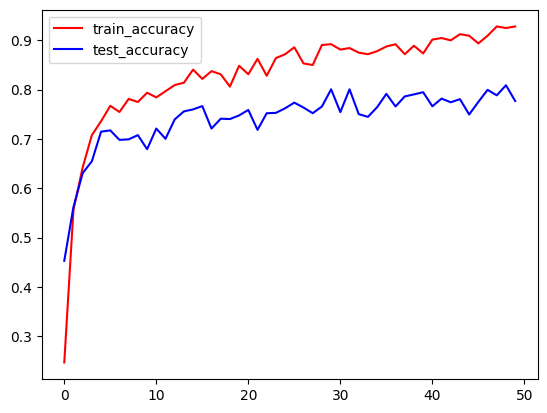

In [12]:
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [13]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [14]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=50)

Epoch 1/50
20/20 [==============================] - 114s 5s/step - loss: 4.1107 - categorical_accuracy: 0.4125 - val_loss: 2066.1570 - val_categorical_accuracy: 0.0063
Epoch 2/50
20/20 [==============================] - 102s 5s/step - loss: 4.2983 - categorical_accuracy: 0.2906 - val_loss: 970625.8750 - val_categorical_accuracy: 0.0800
Epoch 3/50
20/20 [==============================] - 102s 5s/step - loss: 3.4579 - categorical_accuracy: 0.3438 - val_loss: 13.6647 - val_categorical_accuracy: 0.0293
Epoch 4/50
20/20 [==============================] - 106s 5s/step - loss: 3.1723 - categorical_accuracy: 0.3625 - val_loss: 8.0638 - val_categorical_accuracy: 0.0374
Epoch 5/50
20/20 [==============================] - 106s 5s/step - loss: 2.9085 - categorical_accuracy: 0.3734 - val_loss: 5.6185 - val_categorical_accuracy: 0.0281
Epoch 6/50
20/20 [==============================] - 104s 5s/step - loss: 2.5040 - categorical_accuracy: 0.4297 - val_loss: 4.2550 - val_categorical_accuracy: 0.2911
E